In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import tensorflow as tf
from keras.models import load_model
from keras.models import save_model
from keras.metrics import MeanSquaredError, MeanAbsoluteError
from keras.layers import Dense, Dropout
from keras import Sequential
from keras.regularizers import L1,L2
from keras.optimizers import Adam
from keras.metrics import MeanSquaredError, MeanAbsoluteError

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(r'C:\Users\elsayed\Projects\AI\NASA space apps\Solar Wind\_data\omni_csvs\DatedFullData.csv')

In [3]:
df.set_index(['Datetime'] , inplace = True)
df.drop(columns=['Unnamed: 0'] , inplace = True)

In [4]:
df.head()

,Epoch,Rot#,IMF,PLS,IMF_PTS,PLS_PTS,ABS_B,F,THETA_AV,PHI_AV,...,F10_INDEX,KP,DST,AE,AP_INDEX,AL_INDEX,AU_INDEX,PC_N_INDEX,Solar_Lyman_alpha,Proton_QI
Datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,6.346106e+13,2421,51,52,62,38,4.6,4.3,-26.4,127.7,...,999.9,13,-11,39,5,-12,27,0.2,0.006706,0.0243
2011-01-01 01:00:00,6.346106e+13,2421,51,52,56,34,4.5,3.4,5.1,115.2,...,999.9,13,-11,61,5,-29,32,0.7,0.006706,0.0195
2011-01-01 02:00:00,6.346107e+13,2421,51,52,56,32,4.6,4.1,4.2,123.9,...,999.9,13,-9,35,5,-15,20,0.3,0.006706,0.0231
2011-01-01 03:00:00,6.346107e+13,2421,51,52,63,38,3.3,1.8,13.9,122.8,...,999.9,7,-5,42,3,-9,33,0.6,0.006706,0.0076
2011-01-01 04:00:00,6.346107e+13,2421,51,52,60,37,3.2,2.9,-26.1,124.2,...,999.9,7,-3,37,3,-7,30,0.3,0.006706,0.0059


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111445 entries, 2011-01-01 00:00:00 to 2023-09-18 12:00:00
Data columns (total 55 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Epoch              111445 non-null  float64
 1   Rot#               111445 non-null  int64  
 2   IMF                111445 non-null  int64  
 3   PLS                111445 non-null  int64  
 4   IMF_PTS            111445 non-null  int64  
 5   PLS_PTS            111445 non-null  int64  
 6   ABS_B              111445 non-null  float64
 7   F                  111445 non-null  float64
 8   THETA_AV           111445 non-null  float64
 9   PHI_AV             111445 non-null  float64
 10  BX_GSE             111445 non-null  float64
 11  BY_GSE             111445 non-null  float64
 12  BZ_GSE             111445 non-null  float64
 13  BY_GSM             111445 non-null  float64
 14  BZ_GSM             111445 non-null  float64
 15  SIGMA-ABS_B        111445

<Axes: >

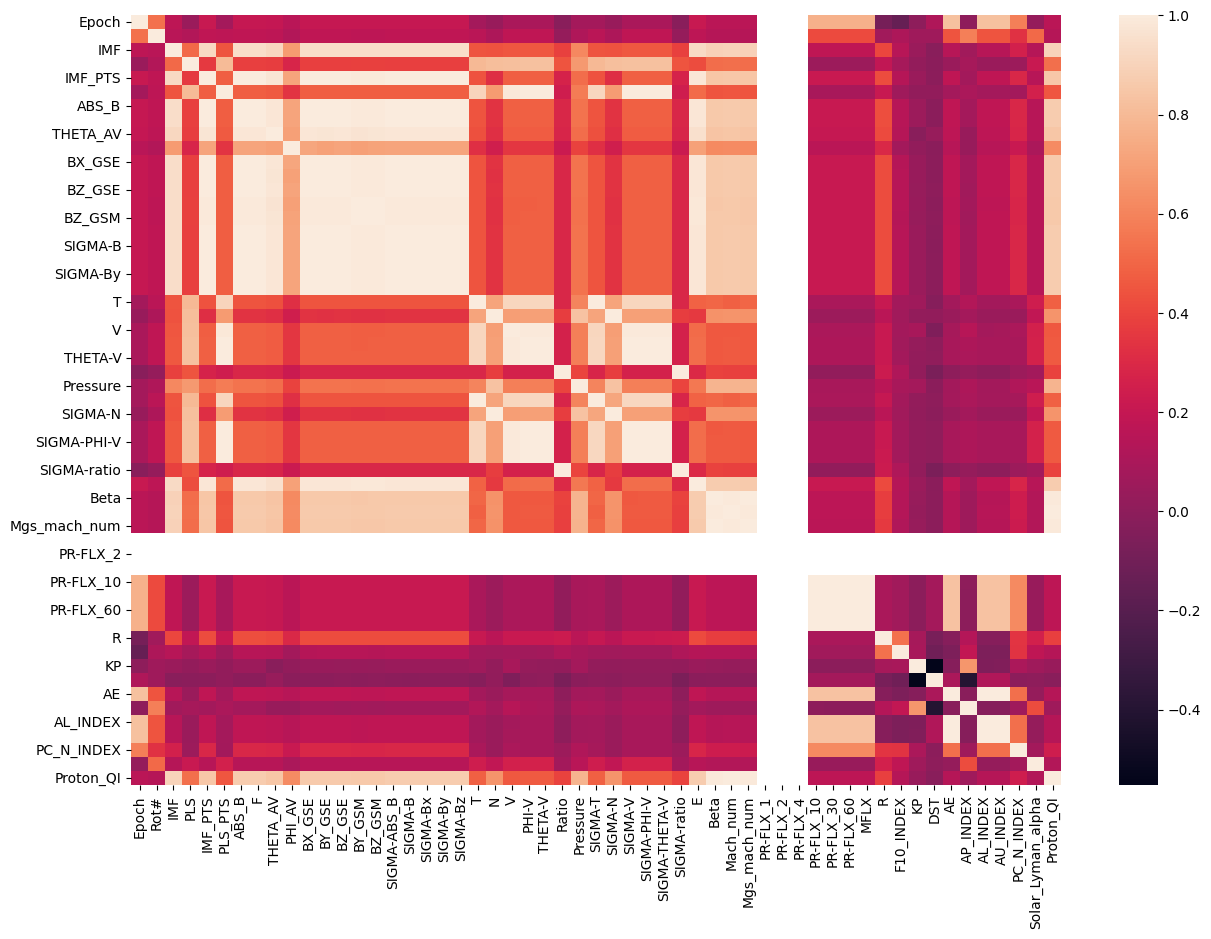

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())

In [7]:
target_column = 'KP'
correlations = df.corr()[target_column]
correlations = correlations
correlations

Epoch                0.004194
Rot#                 0.062243
IMF                  0.042180
PLS                  0.021568
IMF_PTS              0.041789
PLS_PTS              0.016591
ABS_B                0.051633
F                    0.049321
THETA_AV            -0.014992
PHI_AV               0.013353
BX_GSE               0.040573
BY_GSE               0.041355
BZ_GSE               0.035032
BY_GSM               0.040358
BZ_GSM               0.032257
SIGMA-ABS_B          0.041846
SIGMA-B              0.046820
SIGMA-Bx             0.043312
SIGMA-By             0.044156
SIGMA-Bz             0.044736
T                    0.064653
N                    0.020167
V                    0.092283
PHI-V                0.025216
THETA-V              0.019994
Ratio                0.013783
Pressure             0.080838
SIGMA-T              0.021087
SIGMA-N              0.016369
SIGMA-V              0.022125
SIGMA-PHI-V          0.022114
SIGMA-THETA-V        0.022605
SIGMA-ratio          0.012057
E         

In [8]:
drop_columns = ['Epoch','IMF', 'PLS', 'IMF_PTS', 'PLS_PTS','F',
       'THETA_AV', 'PHI_AV', 'BX_GSE', 'BY_GSE', 'BZ_GSE', 'BY_GSM', 'BZ_GSM',
       'SIGMA-ABS_B', 'SIGMA-B', 'SIGMA-Bx', 'SIGMA-By', 'SIGMA-Bz','N','PHI-V', 'THETA-V', 'Ratio','SIGMA-T', 'SIGMA-N',
       'SIGMA-V', 'SIGMA-PHI-V', 'SIGMA-THETA-V', 'SIGMA-ratio', 'E', 'Beta',
       'Mach_num', 'Mgs_mach_num', 'PR-FLX_1', 'PR-FLX_2', 'PR-FLX_4',
       'PR-FLX_10', 'PR-FLX_30', 'PR-FLX_60', 'MFLX','AE','AU_INDEX','Proton_QI']

df.drop(drop_columns, axis=1, inplace=True)

In [9]:
df.head(1)

,Rot#,ABS_B,T,V,Pressure,R,F10_INDEX,KP,DST,AP_INDEX,AL_INDEX,PC_N_INDEX,Solar_Lyman_alpha
Datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,2421,4.6,39168.0,326.0,0.83,48,999.9,13,-11,5,-12,0.2,0.006706


<Axes: >

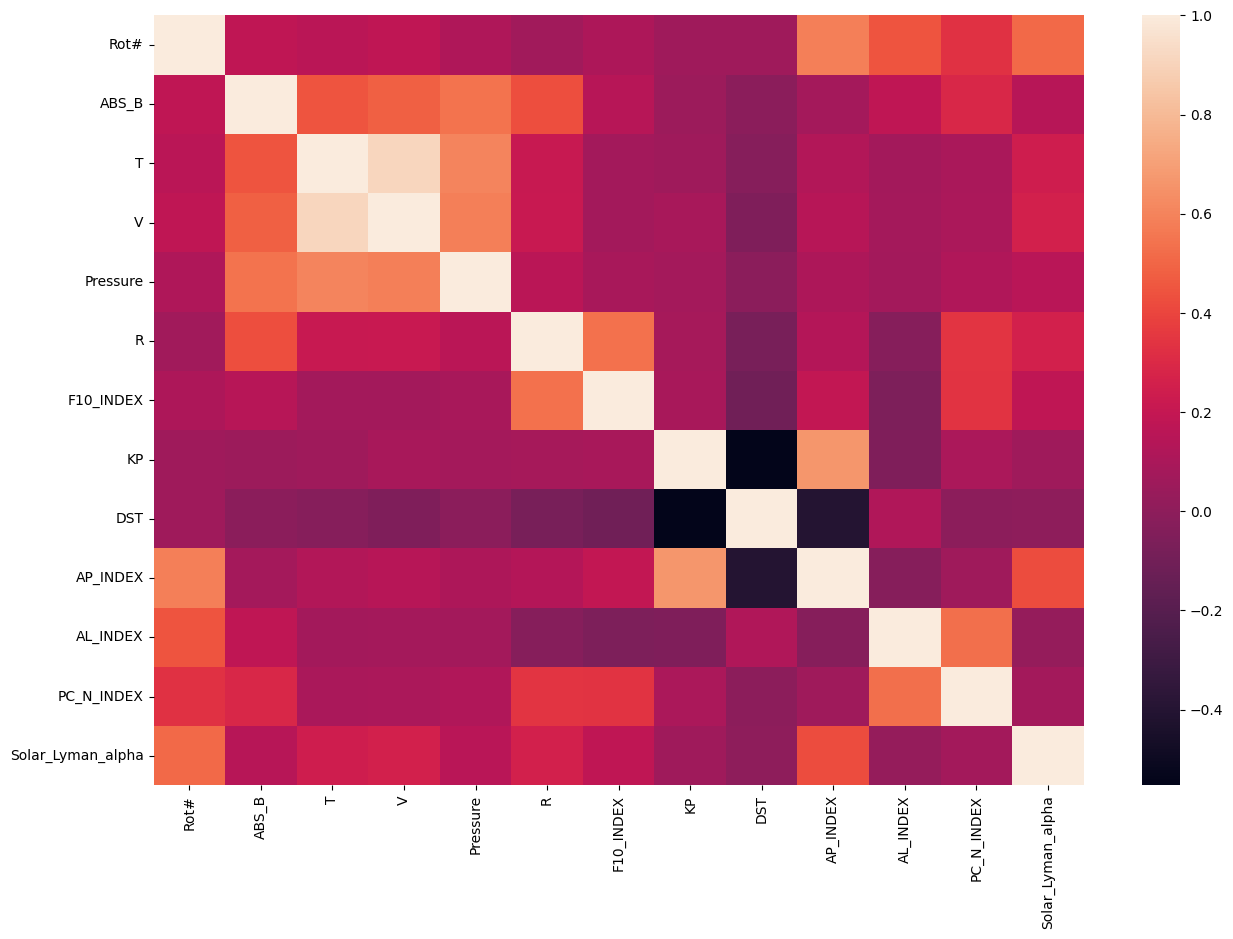

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())

In [11]:
df.columns

Index(['Rot#', 'ABS_B', 'T', 'V', 'Pressure', 'R', 'F10_INDEX', 'KP', 'DST',
       'AP_INDEX', 'AL_INDEX', 'PC_N_INDEX', 'Solar_Lyman_alpha'],
      dtype='object')

In [12]:
df.nunique()

Rot#                   173
ABS_B                  299
T                    80715
V                      567
Pressure              1259
R                      209
F10_INDEX             1134
KP                      27
DST                    235
AP_INDEX                31
AL_INDEX               962
PC_N_INDEX             160
Solar_Lyman_alpha     2314
dtype: int64

In [14]:
df.max().round(2)

Rot#                    9999.00
ABS_B                    999.90
T                    9999999.00
V                       9999.00
Pressure                  99.99
R                        999.00
F10_INDEX                999.90
KP                        99.00
DST                       77.00
AP_INDEX                 999.00
AL_INDEX               99999.00
PC_N_INDEX               999.90
Solar_Lyman_alpha          1.00
dtype: float64

In [15]:
df.min()

Rot#                 2421.000000
ABS_B                   0.500000
T                    3299.000000
V                     240.000000
Pressure                0.040000
R                       0.000000
F10_INDEX              63.400000
KP                      0.000000
DST                  -234.000000
AP_INDEX                0.000000
AL_INDEX            -1611.000000
PC_N_INDEX             -5.900000
Solar_Lyman_alpha       0.005839
dtype: float64

In [16]:
x = df.drop(columns=['KP'])
y = df['KP']

In [17]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [18]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=0)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0)

In [42]:
model = Sequential()

model.add(Dense(64, input_shape = (12,), activation= 'relu'))
model.add(Dense(64, activation= 'relu', bias_regularizer= L2(0.001)))
model.add(Dense(1, activation= 'linear'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                832       
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,057
Trainable params: 5,057
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(loss="mean_squared_error",
              optimizer=Adam(learning_rate=0.0001),
              metrics=[MeanAbsoluteError()])

In [44]:
history = model.fit(x_train, y_train, epochs=70, batch_size=256,validation_data=(x_val, y_val))

Epoch 1/70
305/305 [==============================] - 2s 5ms/step - loss: 393.2553 - mean_absolute_error: 15.5777 - val_loss: 334.7219 - val_mean_absolute_error: 14.0825
Epoch 2/70
305/305 [==============================] - 1s 4ms/step - loss: 272.2342 - mean_absolute_error: 12.5491 - val_loss: 196.8734 - val_mean_absolute_error: 10.6495
Epoch 3/70
305/305 [==============================] - 1s 4ms/step - loss: 149.0174 - mean_absolute_error: 9.3782 - val_loss: 106.7981 - val_mean_absolute_error: 8.2754
Epoch 4/70
305/305 [==============================] - 1s 4ms/step - loss: 96.6427 - mean_absolute_error: 7.8315 - val_loss: 84.3909 - val_mean_absolute_error: 7.4482
Epoch 5/70
305/305 [==============================] - 1s 5ms/step - loss: 81.9807 - mean_absolute_error: 7.2536 - val_loss: 75.4576 - val_mean_absolute_error: 7.0161
Epoch 6/70
305/305 [==============================] - 1s 5ms/step - loss: 73.1669 - mean_absolute_error: 6.8494 - val_loss: 68.0832 - val_mean_absolute_error: 6

In [45]:
val_loss = history.history['val_loss']

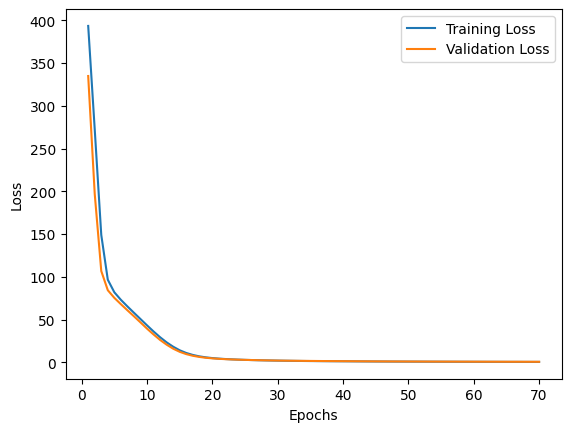

In [46]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [47]:
predictions = model.predict(x_test)

523/523 [==============================] - 1s 1ms/step


In [48]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

RMSE: 0.7544


In [49]:
r2 = r2_score(y_test, predictions)
print(f"R2 Score: {r2:.4f}")

R2 Score: 0.9963


In [50]:
# model.save('solar_wind.h')

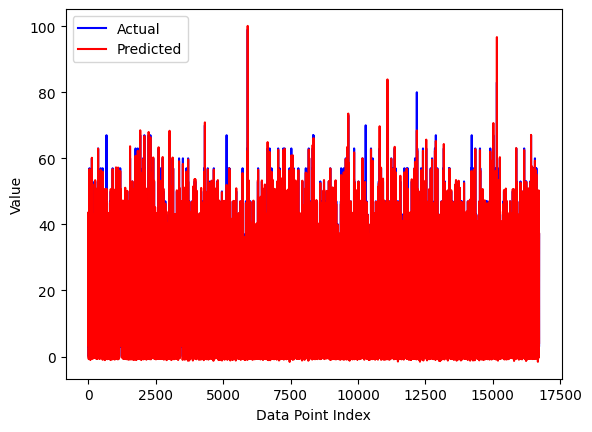

In [53]:
x = range(len(predictions))

plt.plot(x, y_test, label='Actual', color='blue')

plt.plot(x, predictions, label='Predicted', color='red')

plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.legend()

plt.show()